<a href="https://colab.research.google.com/github/patternproject/p.PakistanAI-BootCamp/blob/Week-3/MyAttempt/My_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Revision History

---







*   v1: First Version 
*   v2: Adding logging to trace what is happening in OOP 
*   v3: changing the logging time stamp to local zone i.e Karachi
*   v4: debug statements added across all the functions of class KNearestNeighbor
*   v5: No Change 
*   v6: Minor changes
*   v7: One Loop Variant - implemented
*   v8: Zero Loop Variant - impleneted. Though we get assertion error that calculation of Zero Loop and Two Loops are too different, hence need to be fixed. 


# References

1.   Thoughtful Machine Learning 

Has a chapter on KNN. Available online and on system
https://doc.lagout.org/science/Artificial%20Intelligence/Machine%20learning/Thoughtful%20Machine%20Learning_%20A%20Test-Driven%20Approach%20%5BKirk%202014-10-12%5D.pdf



# K Nearest Neighbors
### *Written By: Sibt ul Hussain*
----
## Goal

Your goal in this assigment is to implement a KNN Classifier.

**Note** Please note that you are allowed to use only those libraries which we have discussed in the workshop, i.e. numpy and pandas.

**Please read each step carefully and understand it fully before proceeding with code writing**

Lets suppose there are $m$ examples of size $d$, which are stored in a training matrix $D$ of size $m \times d$. Now if we use Euclidean distance for the finding the best match for a given test example  $q_{d\times1}$ how many multiplications and additions we will need to perform ?

Here you will be implementing three versions of KNN classifiers, those are:
 1. Using two nested loops, i.e. for a given example you will have to compute its L2 distance with all the training samples, thus you will need to implement it using two nested loops...**Please first complete the assignment using this method and then go for further optimizations mentioned in step 2 and 3**
 2. Using one loop, i.e. you can get rid of one loop using the numpy vectorization (tiling the test example).
 3. The number of multiplications and additions can be reduced a lot if we use an alternate definition of Euclidean distance, i.e. $$||x-y||^2=||x||^2+||y||^2-2x^Ty$$
instead of using the traditional definition $$||x-y||^2=\sum_i (x_i-y_i)^2$$ This definition will help you to implement a very fast version of KNN classifier without using any loop whatsoever. 

#### HelpFul Functions
You might find following functions to be extremely helpful
 - **[argpartition] (http://docs.scipy.org/doc/numpy/reference/generated/numpy.argpartition.html)** uses introselect algorithm to perform an indirect partition along the given axis. This can lead to O(n) complexity instead of O(nlogn). Remember indexing start from 0.

### K Nearest Neighbour Classifier

Now in this assignment we will be implementing the K Nearest Neighbour Classifier for Continuous attributes.


In [1]:
%pylab inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [0]:
# for getting the right time zone
from datetime import datetime
import time

from pytz import timezone, utc

In [0]:
#import pytz
#print(pytz.all_timezones) # 'Asia/Karachi' --> what we want

In [0]:
import logging

changing the logging time stamp to local zone i.e Karachi

SRC: https://stackoverflow.com/questions/32402502/how-to-change-the-time-zone-in-python-logging

In [0]:
#logging.basicConfig(format="%(asctime)s %(message)s", datefmt="%Y-%m-%d %H:%M:%S")

# The filemode is set to w, which means the log file is opened in “write mode” each time basicConfig() is called, and each run of the program will rewrite the file. 
logging.basicConfig(filename='example.log',filemode='w', level=logging.DEBUG,format='%(asctime)s %(message)s', datefmt="%Y-%m-%d %H:%M:%S")


logger = logging.getLogger(__name__)
logger.error("default")

logging.Formatter.converter = time.localtime
logger.error("localtime")

logging.Formatter.converter = time.gmtime
logger.error("gmtime")

def customTime(*args):
  utc_dt = utc.localize(datetime.utcnow())
  #my_tz = timezone("US/Eastern")
  my_tz = timezone("Asia/Karachi")
  converted = utc_dt.astimezone(my_tz)
  return converted.timetuple()

logging.Formatter.converter = customTime
logger.error("customTime")

In [0]:
# The filemode is set to w, which means the log file is opened in “write mode” each time basicConfig() is called, and each run of the program will rewrite the file. 
#logging.basicConfig(filename='example.log',filemode='w', level=logging.DEBUG,format='%(asctime)s %(message)s')


# this 'w' flag does not seem to work for colab. you have to restart the run-time to get a new file "example.log"

In [0]:
logging.debug('Logging Started')

In [8]:
! cat example.log

2020-03-06 22:20:09 default
2020-03-06 22:20:09 localtime
2020-03-06 22:20:09 gmtime
2020-03-07 03:20:09 customTime
2020-03-07 03:20:09 Logging Started


(above you should only see, till "Logging Started" 

if you see more, it means log file is appending to an older version. Easiest in colab is to restart the runtime, which will enforce the log file to be created from scratch

Implmentation of KNearestNeighbor Class

In [0]:
# TODO: You have to implement the following class

class KNearestNeighbor:
    ''' Implements the KNearest Neigbours For Classification... '''
    def __init__(self, k, scalefeatures=False):        
        logging.debug(f'>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
        logging.debug(f'Entering: __init__ of kNearestNeighbor')
        logging.debug(f'with k=, {k}')
        self.k=k
        self.scalefeatures=scalefeatures
        logging.debug(f'Leaving: __init__ of kNearestNeighbor')
        logging.debug(f'-------------------------------------')
        
    
    def compute_distances_two_loops(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using a nested loop over both the training data and the 
        test data.

        Input:
        X - An num_test x dimension array where each row is a test point.

        Output:
        dists - A num_test x num_train array where dists[i, j] is the distance
                between the ith test point and the jth training point.
        """
        logging.debug(f'>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
        logging.debug('Entering: compute_distances_two_loops()')
        #logging.debug(f'X passed is) {X}')
        
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            for j in range(num_train):
                #####################################################################
                # TODO:                                                             #
                # Compute the l2 distance between the ith test point and the jth    #
                # training point, and store the result in dists[i, j]               #
                #####################################################################
                # YOUR CODE HERE
                #print(i)
                #print(j)
                logging.debug(f'ith test point: {X[i]}')
                logging.debug(f'jth training point: {self.X_train[j]}')
                logging.debug(f'l2 distance: {np.linalg.norm(X[i]-self.X_train[j])}')
                dists[i][j] = np.linalg.norm(X[i]-self.X_train[j])
                #pass

                #####################################################################
                #                       END OF YOUR CODE                            #
                #####################################################################
        
        logging.debug(f'Leaving: compute_distances_two_loop()')
        logging.debug(f'-------------------------------------')
        return dists

    def compute_distances_one_loop(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using a single loop over the test data.

        Input / Output: Same as compute_distances_two_loops
        """
        logging.debug(f'>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
        logging.debug('Entering: compute_distances_one_loop()')
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            #######################################################################
            # TODO:                                                               #
            # Compute the l2 distance between the ith test point and all training #
            # points, and store the result in dists[i, :].                        #
            #######################################################################
            # YOUR CODE HERE
            
            logging.debug(f'ith test point: {X[i]}')
            #logging.debug(f'training matrix: {self.X_train}') # too much clutter, prints the whole matrix
            #logging.debug(f'l2 distance via norm: {np.linalg.norm(X[i]-self.X_train)}') # this is not correct for sure
            logging.debug(f'l2 distance via np form: {np.sqrt(np.sum(np.square(X[i] - self.X_train),axis=1))}')
            dists[i,:] = np.sqrt(np.sum(np.square(X[i] - self.X_train),axis=1))
            #pass
            #######################################################################
            #                         END OF YOUR CODE                            #
            #######################################################################
        
        logging.debug(f'Leaving: compute_distances_one_loop()')
        logging.debug(f'-------------------------------------')

        return dists

    def compute_distances_no_loops(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using no explicit loops.

        Input / Output: Same as compute_distances_two_loops
        """
        
        logging.debug(f'>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
        logging.debug('Entering: compute_distances_no_loops()')

        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train)) 
        #########################################################################
        # TODO:                                                                 #
        # Compute the l2 distance between all test points and all training      #
        # points without using any explicit loops, and store the result in      #
        # dists.                                                                #
        # HINT: Try to formulate the l2 distance using matrix multiplication    #
        #       and two broadcast sums.   
        #                                                                       #
        #########################################################################
        # YOUR CODE HERE
        # no logging of values as this would be too much clutter
        dists = np.linalg.norm(X,2) + np.linalg.norm(self.X_train,2) - 2*(np.dot(X,self.X_train.T))
        #dists = np.linalg.norm(X) + np.linalg.norm(self.X_train) - 2*(np.dot(self.X_train,X.T))

        #pass
        #########################################################################
        #                         END OF YOUR CODE                              #
        #########################################################################
        
        
        logging.debug(f'Leaving: compute_distances_no_loops()')
        logging.debug(f'-------------------------------------')

        return dists
    
    
    def scale_features(self,X):
        """
            Normalize each feature to lie in the range [0 ,1]

            Input:
            ------

                X= M x d dimensional data matrix

            Returns:
            --------

                normalized X
        """
        
        logging.debug(f'>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
        logging.debug('Entering: scale_features()')

        # we will store these values compute on training set to use during testing 
        self.xmin= np.min(X,axis=0)
        self.xmax= np.max(X,axis=0)

        logging.debug(f'Leaving: scale_features()')
        logging.debug(f'-------------------------------------')

        return (X-self.xmin)/(self.xmax-self.xmin)


    def train(self, X, Y):
        ''' Train K Nearest Neighbour classifier using the given 
            X [m x d] data matrix and Y labels matrix
            
            Input:
            ------
            X: [m x d] a data matrix of m d-dimensional examples.
            Y: [m x 1] a label vector.
            
            Returns:
            -----------
            Nothing
            '''
        
        logging.debug(f'>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
        logging.debug(f'Entering: train() kNearestNeighbor')
        
        nexamples,nfeatures=X.shape
        
        if self.scalefeatures:
            X=self.scale_features(X)
        
        # YOUR CODE HERE
        #define self.X_train to store the training data...
        self.X_train = X
        
        #define self.Y_train to store the training labels
        self.Y_train = Y

        logging.debug(f'Leaving: train() kNearestNeighbor')
        logging.debug(f'-------------------------------------')
    
    def predict(self, X, methodtype='noloops'):
        
        """
        Test the trained K-Nearset Neighoubr classifier result on the given examples X
        
                   
            Input:
            ------
            X: [m x d] a matrix of m  d-dimensional test examples.
            methodtype: which method to use for calculating distances.
               noloops: without using any loop
               oneloop: using one loop
               twoloops: using two nested loops...
               
            Returns:
            -----------
                pclass: the predicted class for the given set of examples, i.e. to which it belongs
        """
        
        logging.debug(f'>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
        logging.debug('Entering: predict()')
        
        num_test = X.shape[0]
        
        if self.scalefeatures:
            X=(X-self.xmin)/(self.xmax-self.xmin)
        
        y_pred = np.zeros(num_test, dtype = self.Y_train.dtype)
        
        # defining a function variable so that you will only need to call compute_distance...
        if methodtype == 'noloops':
            compute_distance = self.compute_distances_no_loops
        elif methodtype == 'oneloop':
            compute_distance = self.compute_distances_one_loop
        else:
            compute_distance = self.compute_distances_two_loops
        
        dists=compute_distance(X)
        # YOUR CODE HERE
        #y_pred = dists
        # for each vector, we will have a row of values in dists matrix
        # thus for each row:
        # find the min value in row (and then get the index of this min row)
        # now find the label of value in this index in the train data set
        
        # YOUR CODE END HERE

        logging.debug(f'Leaving: predict()')
        logging.debug(f'-------------------------------------')
        
        return y_pred

In [0]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..

In [0]:
logging.debug('Importing Libraries')

In [12]:
#load the data set
data=pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print(data.describe())

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   149.000000  149.000000
mean      5.848322    3.051007     3.774497    1.205369
std       0.828594    0.433499     1.759651    0.761292
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.400000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [0]:
logging.debug('Read the data set')
logging.debug(f'data read is \n {data.describe()}')

In [0]:
# Get your data in matrix
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
# print(" Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape)

In [0]:
logging.debug('Converted to numpy arrays')
logging.debug('Dropped na')
logging.debug(f'Data Set Dimensions= {X.shape}, True Class labels dimensions={Y.shape}')


#logging.debug(" Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape)
#logging.debug(" Data Set Dimensions= {} True Class labels dimensions {}".format(X.shape, Y.shape))


In [0]:
# Split your data into training and test-set... 
# see the documentation of split_data in tools for further information...
Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)

#print(" Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape)   
#print(" Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytest.shape)

In [0]:
logging.debug('Split into train and test sets')
#logging.debug(" Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape)   
#logging.debug(" Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytest.shape)
#logging.error(f'{name} raised an error')
logging.debug(f'Test Data Set Dimensions=, {Xtest.shape} Test True Class labels dimensions {Ytest.shape}')

# Training Time

In [0]:
# Lets train a Decision Tree Classifier on Petal Length and Width
feat=[0,1]
knn=KNearestNeighbor(3) # train a 3-nearest neighbour classifier...
knn.train(Xtrain[:,feat],Ytrain)

### Testing Your Distance Implementation and Timing (Profiling it)

In [0]:
#first lets compute distance of each test example from all the training examples using two loops
# logging.debug('This message should go to the log file')
dists = knn.compute_distances_two_loops(Xtest[:,feat])

(45, 104)


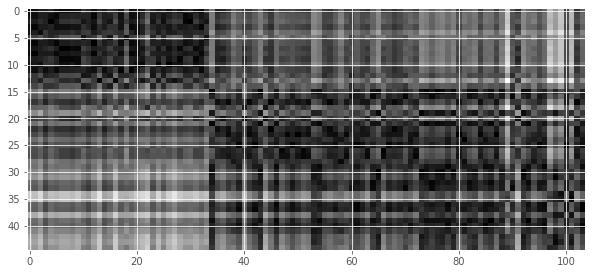

In [20]:
print(dists.shape)
# We can visualize the distance matrix: each row is a single test example and its distances to training examples",
plt.imshow(dists, interpolation='none')
plt.gray()
#here dark means less distance and light means high distance...

#### Optimization time
If you find spending too much time on these two steps skip them and come back later to speed up your implementation

In [21]:
!pip install nose

In [22]:
from nose.tools import assert_less_equal
feat=[0,1]
knn=KNearestNeighbor(3)
knn.train(Xtrain[:,feat],Ytrain)

dists = knn.compute_distances_two_loops(Xtest[:,feat])
one_loop_dists = knn.compute_distances_one_loop(Xtest[:,feat])
no_loop_dists = knn.compute_distances_no_loops(Xtest[:,feat])

difference = np.linalg.norm(dists - one_loop_dists, ord='fro')
difference_1 = np.linalg.norm(dists - no_loop_dists, ord='fro')

assert_less_equal(difference, 0.001, "Two loops and one loop distance varies")
assert_less_equal(difference_1, 0.001, "Two loops and no loop distance varies")

AssertionError: ignored

In [23]:
from nose.tools import assert_less_equal
import time

feat=[0,1]
knn=KNearestNeighbor(3)
knn.train(Xtrain[:,feat],Ytrain)

start = time.time()
knn.compute_distances_two_loops(Xtest[:,feat])
end = time.time()
two_loops = (end - start)
print("Two loops took : ",(end - start))

start = time.time()
one_loop = knn.compute_distances_one_loop(Xtest[:,feat])
end = time.time()
one_loop = (end - start)
print("One loops took : ",(end - start))

start = time.time()
no_loop = knn.compute_distances_no_loops(Xtest[:,feat])
end = time.time()
no_loop = (end - start)
print("No loops took  : ",(end - start))

assert_less_equal(one_loop, two_loops/10.0)
assert_less_equal(no_loop, one_loop)

Two loops took :  2.068767547607422
One loops took :  0.056665897369384766
No loops took  :  0.0015239715576171875


# Testing

In [0]:
#Lets test it on the set of unseen examples...
pclasses=knn.predict(Xtest[:,feat])

In [0]:
print(pclasses)

Lets see how good we are doing...
==================

In [0]:
#Lets see how good we are doing, by finding the accuracy on the test set..
print(np.sum(pclasses==Ytest))
print("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

In [0]:
from nose.tools import assert_greater_equal

eat=[0,1]
knn=KNearestNeighbor(3)
knn.train(Xtrain[:,feat],Ytrain)
pclasses=knn.predict(Xtest[:,feat])
acc = np.sum(pclasses==Ytest)/float(Ytest.shape[0])

assert_greater_equal(acc, 0.64)

In [0]:
#Lets plot the decision surface
#%debug
print(" Plotting the Decision Surface of Training Set... ")
t.plot_decision_regions(Xtrain[:,feat],Ytrain,clf=knn, res=0.02, cycle_marker=True, legend=1)

In [0]:
print(" Plotting the Decision Surface of Test Set... ")
t.plot_decision_regions(Xtest[:,feat],Ytest,clf=knn, res=0.02, cycle_marker=True, legend=1)

# Feature Scaling (or Normalization)

Since we are using Euclidean distance to find the nearest neighbours, which is (as we have seen in the lectures) is heavily influenced by differently scaled features (that features having different scales and ranges). So to make best of K Nearest Neigbhour classifier we will be needed to first scale each feature dimension. Now lets go and write code for the feature scaling in KNearestNeighbour...

In [0]:
# Lets train a KNN Classifier on Normalized Petal Length and Width
feat=[0,1]
knn=KNearestNeighbor(3,scalefeatures=True) # train a 3-nearest neighbour classifier...

knn.train(Xtrain[:,feat],Ytrain)
#Lets test it on the set of unseen examples...
pclasses=knn.predict(Xtest[:,feat])

print(np.sum(pclasses==Ytest))
print("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

In [0]:
print(" Plotting the Decision Surface of Test Set... ")
t.plot_decision_regions(Xtest[:,feat],Ytest,clf=knn, res=0.02, cycle_marker=True, legend=1)

# Comment on the effect of feature scaling and normalization. 

What is the difference between the results of normalized features and non-normalized features? Why we are seeing the improvement (or decrease) in the accuracy?

# Lets Train on all four features....

In [0]:
#Lets Train on all four features....

# Lets train a Decision Tree Classifier on Petal Length and Width
feat=[0, 1, 2, 3]
knn=KNearestNeighbor(3)#
knn.train(Xtrain[:,feat],Ytrain)
pclasses=knn.predict(Xtest[:,feat])
#Lets see how good we are doing, by finding the accuracy on the test set..
print(np.sum(pclasses==Ytest))
print("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

In [0]:
from nose.tools import assert_greater_equal

feat=[0, 1, 2, 3]
knn=KNearestNeighbor(3)
knn.train(Xtrain[:,feat],Ytrain)
pclasses=knn.predict(Xtest[:,feat])
acc = np.sum(pclasses==Ytest)/float(Ytest.shape[0])

assert_greater_equal(acc, 0.90)

What can you conclude ?
====================
Using more features means giving more information to our classifier which results in better accuracy. Reducing a single feature means reducing a whole dimension meaning neglecting a whole dimension of maybe useful data.



# Cross-Validation

Until now we have been splitting the dataset into a training and test set rather randomly and were reporting a rather artifical performance. Now we are going to test our system exhaustively by making use of k-fold [cross validation](http://en.wikipedia.org/wiki/Cross-validation_%28statistics%29). 

Now go and tune your hyper-parameters (K in this case) to opitmize the performance for only first two parameters.

In [0]:
import time

In [0]:
# Now lets cross validate for best paramters, and test the result...
# We will be training four different models on four different partitions of data set and 
# then will be reporting the mean accuracy of the four classifiers.
stime=time.time()


nfolds=4 # lets use four folds..
folds=t.generate_folds(X,Y,nfolds)
features=[0,1] # features to use for our system
#now lets train and test on these folds...

#Lets perform the grid search...
ks=np.arange(1,20,2) # search the k in the range one to 20...
foldacc=[] # store the mean accuracy of every fold in this list
bestMeanAccuracy = 0.0 # store the best mean accuracy across folds in this
bestk = 0 # store the value of best k in this

# YOUR CODE START HERE


# YOUR CODE END HERE

print("\n\nBest value for K = {} which gives mean accuracy = {}".format(bestk,bestMeanAccuracy))
etime=time.time()

print('\nTotal Time Taken ={}'.format(etime-stime))

In [0]:
#Lets plot the accuracy w.r.t K
plt.plot(ks,foldacc)
plt.xlabel('K Neigbhours (Value of K\'s)')
plt.ylabel('Accuracy')
plt.title('Cross Validation Accuracy for different Values of K')

# Lets retrain the classifier with best-k and see its accuracy using only first two features...

In [0]:
print(bestk)

In [0]:
feat=[0,1]
knn=KNearestNeighbor(bestk,scalefeatures=True) # train a kbest-nearest neighbour classifier...
knn.train(Xtrain[:,feat],Ytrain)

#Lets test it on the set of unseen examples...
pclasses=knn.predict(Xtest[:,feat])
#Lets see how good we are doing, by finding the accuracy on the test set..
print(np.sum(pclasses==Ytest))
print("KNN Accuracy (for best K={}) ={} ".format(bestk,np.sum(pclasses==Ytest)/float(Ytest.shape[0])))

In [0]:
print(" Plotting the Decision Surface of Test Set... ")
t.plot_decision_regions(Xtest[:,feat],Ytest,clf=knn, res=0.02, cycle_marker=True, legend=1)

### Note the improvement of properly configured classifier w.r.t. to the classifier trained using only 3 Neigbours

In this case the dataset is small so no improvement is shown by using bestk versus k=3 but if the dataset had been large, surely bestk would have given better results.

This is the true representative accuracy measure of our system. Since, we are removing the selection bias and hence can be much more confidently use the score as a reflection of our system's performance.